In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clickbait-text/yatiraj_data.csv


In [3]:
import numpy
import pandas
import matplotlib.pyplot

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

In [6]:
import tensorflow

In [7]:
train_dir=ImageDataGenerator(rescale=1/255)

In [19]:
train_cnn=train_dir.flow_from_directory(directory='/kaggle/input/clickbait-image-dataset/clickbait/clickbait_train',
                                       target_size=(224,224),
                                       class_mode='binary',
                                       batch_size=32,
                                       shuffle=True)

Found 244 images belonging to 2 classes.


In [20]:
test_cnn=train_dir.flow_from_directory(directory='/kaggle/input/clickbait-image-dataset/clickbait/clickbait_test',
                                       target_size=(224,224),
                                       class_mode='binary',
                                       batch_size=32,
                                       shuffle=True)

Found 60 images belonging to 2 classes.


In [252]:
base_model=tensorflow.keras.applications.VGG16(include_top=False)

In [253]:
len(base_model.layers)

19

In [254]:
base_model.trainable=True

In [255]:
inputs=tensorflow.keras.layers.Input(shape=(224,224,3))
x=base_model(inputs)
x=tensorflow.keras.layers.GlobalAveragePooling2D()(x)
output=tensorflow.keras.layers.Dense(1,activation='sigmoid')(x)

In [256]:
model_cnn=tensorflow.keras.Model(inputs,output)

In [257]:
model_cnn.compile(optimizer=tensorflow.keras.optimizers.SGD(),
             loss=tensorflow.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [258]:
history1=model_cnn.fit(train_cnn,epochs=60)

Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 629ms/step - accuracy: 0.4820 - loss: 0.7325
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 482ms/step - accuracy: 0.6915 - loss: 0.6634
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.6211 - loss: 0.6360
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.7819 - loss: 0.5617
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 485ms/step - accuracy: 0.6340 - loss: 0.6085
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 492ms/step - accuracy: 0.8446 - loss: 0.4741
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 507ms/step - accuracy: 0.7820 - loss: 0.4671
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - accuracy: 0.8196 - loss: 0.4168
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step - accuracy: 0.8476 - loss: 0.3319
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 527ms/step - accuracy: 0.8035 - loss: 0.4773
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 529ms/step - accuracy: 0.9081 - loss: 0.3353
Epoch 12/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 534ms/step - accuracy: 0.9010 - l

In [259]:
cnn_accuracy=model_cnn.evaluate(test_cnn)[1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - accuracy: 0.8472 - loss: 1.4532


In [260]:
cnn_accuracy

0.8333333134651184

In [85]:
model.save('my_model.h5')

In [262]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_ytrue_binary_from_flow_directory_with_shuffle(generator, steps):
    y_true = []
    for i in range(steps):
        _, labels = generator[i]
        y_true.extend(labels.flatten())
    return np.array(y_true)

steps = len(test_cnn)

y_true=get_ytrue_binary_from_flow_directory_with_shuffle(test_cnn, steps=steps)
predictions=model_cnn.predict(test_cnn, steps=steps)
ypred=(predictions > 0.5).astype(int).flatten()

accuracy=accuracy_score(y_true, ypred)
precision_cnn=precision_score(y_true, ypred)
recall_cnn=recall_score(y_true, ypred)
f1_cnn=f1_score(y_true, ypred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision_cnn:.2f}")
print(f"Recall: {recall_cnn:.2f}")
print(f"F1 Score: {f1_cnn:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step
Accuracy: 0.83
Precision: 0.88
Recall: 0.77
F1 Score: 0.82


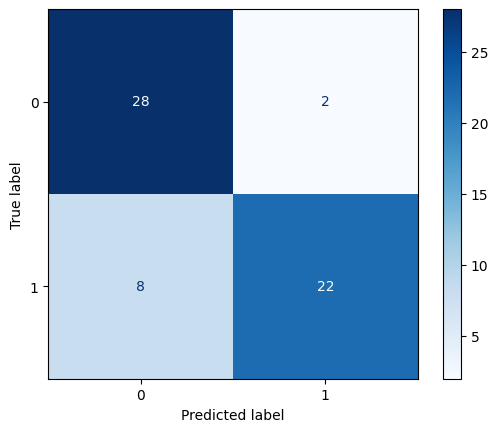

In [145]:
cm = confusion_matrix(y_true,ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=matplotlib.pyplot.cm.Blues)

**KNN**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn=KNeighborsClassifier()

In [57]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = "/kaggle/input/clickbait-image-dataset/clickbait/clickbait_train"

classes = os.listdir(dataset_path)
label_map = {cls: i for i, cls in enumerate(classes)}

X, y = [], []
image_size = (224, 224) 

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)  # Load image
        img = cv2.resize(img, image_size)  # Resize
        img = img.flatten()
        
        X.append(img)
        y.append(label_map[cls])

x_train= np.array(X)
y_train= np.array(y)

In [58]:

dataset_path = "/kaggle/input/clickbait-image-dataset/clickbait/clickbait_test"

classes = os.listdir(dataset_path)
label_map = {cls: i for i, cls in enumerate(classes)}

X, y = [], []
image_size = (224, 224) 

for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)  # Load image
        img = cv2.resize(img, image_size)  # Resize
        img = img.flatten()
        
        X.append(img)
        y.append(label_map[cls])

x_test= np.array(X)
y_test= np.array(y)

In [59]:
import tqdm

In [60]:
tqdm.tqdm.pandas()

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
knn_accuracy=knn.score(x_test,y_test)

In [63]:
knn_accuracy

0.48333333333333334

In [263]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = knn.predict(x_test)
ypred = (predictions > 0.5).astype(int).flatten()
accuracy_knn=accuracy_score(y_true, ypred)
precision_knn=precision_score(y_true, ypred)
recall_knn=recall_score(y_true, ypred)
f1_knn=f1_score(y_true, ypred)

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")

Accuracy: 0.55
Precision: 0.56
Recall: 0.47
F1 Score: 0.51


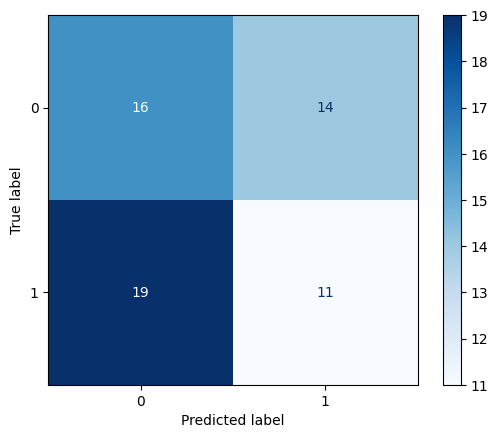

In [143]:
cm = confusion_matrix(y_true,ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=matplotlib.pyplot.cm.Blues)

**SVM**

In [64]:
from sklearn.svm import SVC

In [65]:
s_v_m=SVC()

In [66]:
s_v_m.fit(x_train,y_train)

SVC()

In [68]:
svm_accuracy=s_v_m.score(x_test,y_test)

In [69]:
svm_accuracy

0.6666666666666666

In [264]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = s_v_m.predict(x_test)
ypred = (predictions > 0.5).astype(int).flatten()
accuracy_svm= accuracy_score(y_true, ypred)
precision_svm= precision_score(y_true, ypred)
recall_svm= recall_score(y_true, ypred)
f1_svm= f1_score(y_true, ypred)

print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")
print(f"F1 Score: {f1_svm:.2f}")

Accuracy: 0.53
Precision: 0.53
Recall: 0.63
F1 Score: 0.58


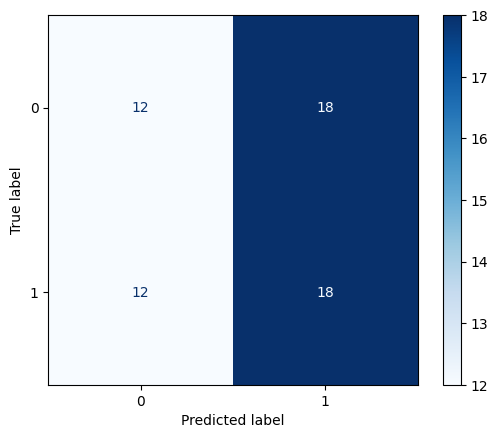

In [141]:
cm = confusion_matrix(y_true,ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=matplotlib.pyplot.cm.Blues)

**Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
dt_accuracy=dt.score(x_test,y_test)

In [75]:
dt_accuracy

0.8

In [265]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = dt.predict(x_test)
ypred = (predictions > 0.5).astype(int).flatten()
accuracy_dt= accuracy_score(y_true, ypred)
precision_dt= precision_score(y_true, ypred)
recall_dt= recall_score(y_true, ypred)
f1_dt= f1_score(y_true, ypred)

print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_dt:.2f}")

Accuracy: 0.40
Precision: 0.40
Recall: 0.40
F1 Score: 0.40


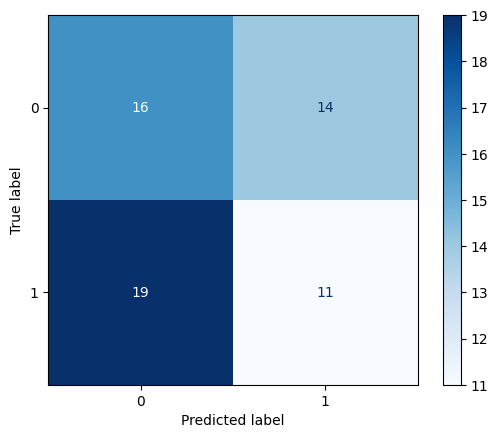

In [139]:
cm = confusion_matrix(y_true,ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=matplotlib.pyplot.cm.Blues)

**analysis of image data**

In [76]:
final=[knn_accuracy,cnn_accuracy,svm_accuracy,dt_accuracy]

In [77]:
final

[0.48333333333333334, 0.8333333134651184, 0.6666666666666666, 0.8]

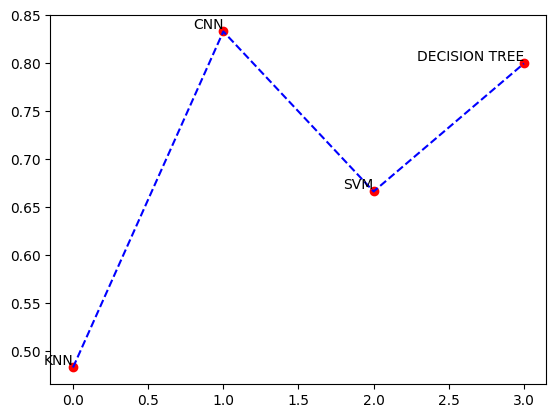

In [78]:
labels = ['KNN','CNN', 'SVM', 'DECISION TREE']
x_values = range(len(final))
dev,harsh = matplotlib.pyplot.subplots()
harsh.scatter(x_values, final, color='red')

for i, label in enumerate(labels):
    harsh.text(x_values[i], final[i], label, fontsize=10, ha='right', va='bottom')
harsh.plot(x_values, final, linestyle='dashed', color='blue')

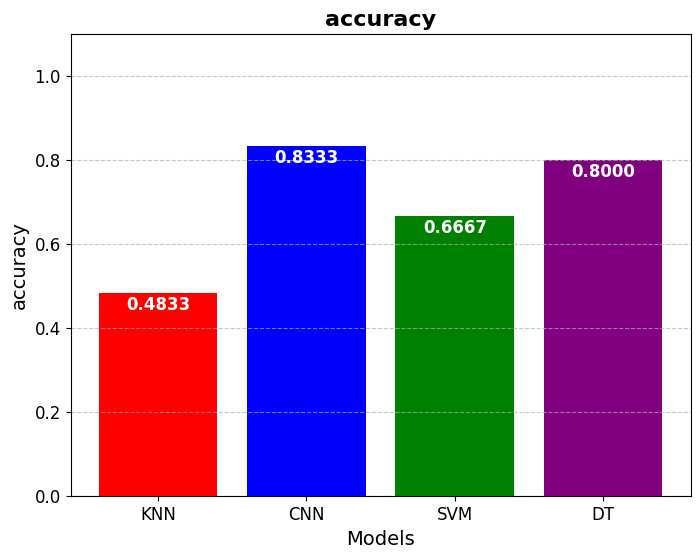

In [250]:
models = ["KNN", "CNN", "SVM", "DT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,final,color=colors,width=0.8)

for bar, acc in zip(bars, final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("accuracy", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


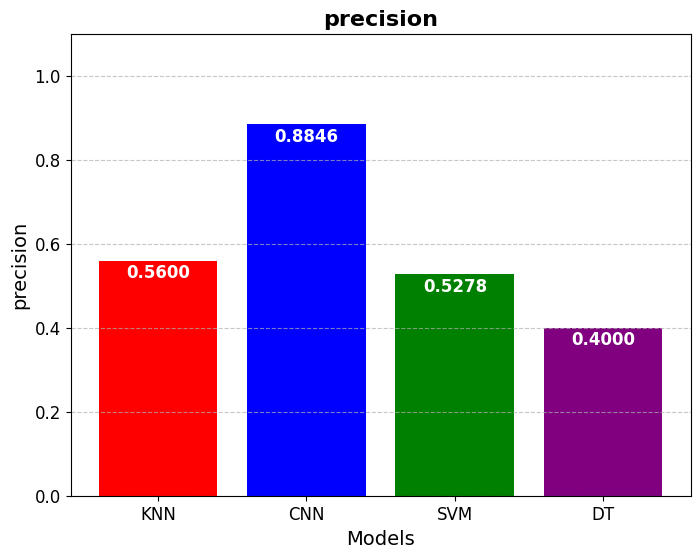

In [266]:
final=[precision_knn,precision_cnn,precision_svm,precision_dt]
models = ["KNN", "CNN", "SVM", "DT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,final,color=colors,width=0.8)

for bar, acc in zip(bars, final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("precision", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("precision", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

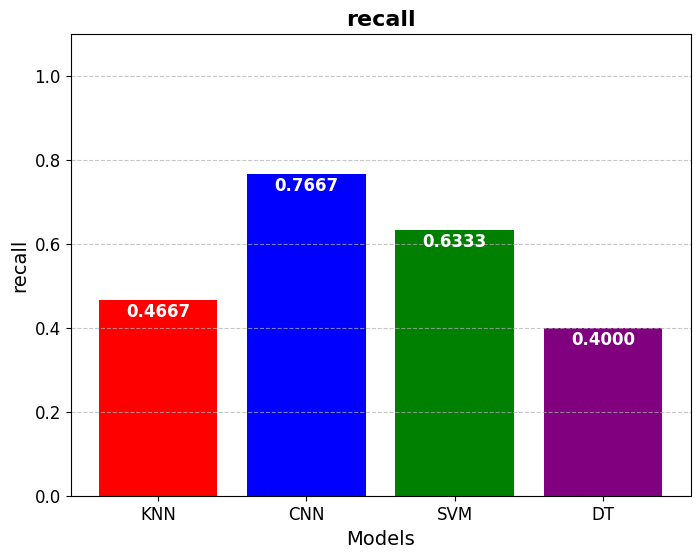

In [267]:
final=[recall_knn,recall_cnn,recall_svm,recall_dt]
models = ["KNN", "CNN", "SVM", "DT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,final,color=colors,width=0.8)

for bar, acc in zip(bars, final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("recall", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("recall", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

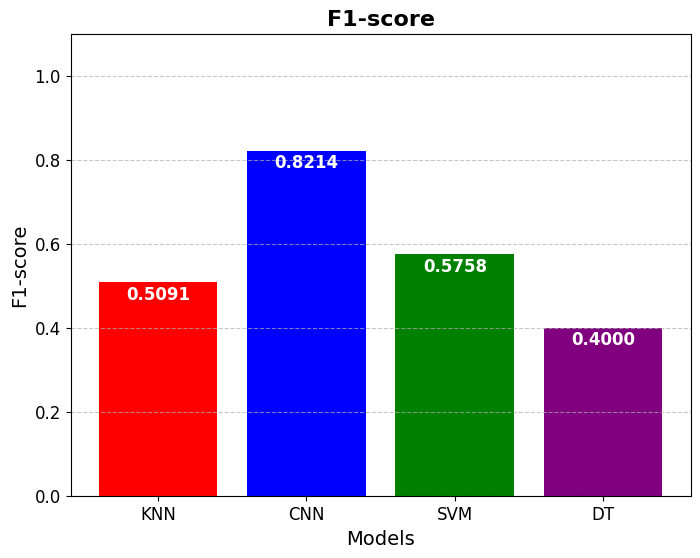

In [268]:
final=[f1_knn,f1_cnn,f1_svm,f1_dt]
models = ["KNN", "CNN", "SVM", "DT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,final,color=colors,width=0.8)

for bar, acc in zip(bars, final):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("F1-score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("F1-score", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()

In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Text Data**

In [86]:
data=pandas.read_csv('/kaggle/input/clickbait-text/yatiraj_data.csv')

In [87]:
data.head(5)

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [88]:
data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [89]:
data['labels']=data['clickbait']
data.drop('clickbait',axis=1,inplace=True)

In [90]:
label2id={0:'NO',1:'YES'}

In [91]:
!pip install datasets

**emoji processing**

In [92]:
import emoji
def emoji_conversion(text):
    text = emoji.demojize(text)
    return text

In [93]:
data['headline']=data['headline'].map(emoji_conversion)

In [94]:
data

,headline,labels
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
train,test=train_test_split(data,test_size=0.2)

In [97]:
from datasets import Dataset,DatasetDict

In [98]:
train_data=DatasetDict(
    {'train':Dataset.from_pandas(train,preserve_index=False),
    'test':Dataset.from_pandas(test,preserve_index=False)
    }
)

In [204]:
train_data['test']

Dataset({
    features: ['headline', 'labels'],
    num_rows: 6400
})

In [180]:
from transformers import AutoTokenizer
token_bert_name='google-bert/bert-base-uncased'
token_bert=AutoTokenizer.from_pretrained(token_bert_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [100]:
token_distilbert_name='distilbert/distilbert-base-uncased-finetuned-sst-2-english'
token_distilbert=AutoTokenizer.from_pretrained(token_distilbert_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [101]:
token_tinybert_name='Intel/dynamic_tinybert'
token_tinybert=AutoTokenizer.from_pretrained(token_tinybert_name)

tokenizer_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [102]:
token_roberta_name='cardiffnlp/twitter-roberta-base-sentiment-latest'
token_roberta=AutoTokenizer.from_pretrained(token_roberta_name)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [191]:
def tokenize_bert(data):
  return token_bert(data['headline'],truncation=True,padding=True,max_length=30)

In [104]:
def tokenize_distilbert(data):
  return token_distilbert(data['headline'],truncation=True,padding=True,max_length=128)

In [105]:
def tokenize_tinybert(data):
  return token_tinybert(data['headline'],truncation=True,padding=True,max_length=128)

In [106]:
def tokenize_roberta(data):
  return token_roberta(data['headline'],truncation=True,padding=True,max_length=128)

In [192]:
tokenized_data_bert=train_data.map(tokenize_bert,batched=True)

Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

In [107]:
tokenized_data_distilbert=train_data.map(tokenize_distilbert,batched=True)

Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

In [108]:
tokenized_data_tinybert=train_data.map(tokenize_tinybert,batched=True)

Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

In [110]:
tokenized_data_roberta=train_data.map(tokenize_roberta,batched=True)

Map:   0%|          | 0/25600 [00:00<?, ? examples/s]

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

In [182]:
tokenized_data_bert

DatasetDict({
    train: Dataset({
        features: ['headline', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25600
    })
    test: Dataset({
        features: ['headline', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6400
    })
})

In [187]:
tokenized_data_bert['train']

Dataset({
    features: ['headline', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 25600
})

In [113]:
from transformers import AutoModelForSequenceClassification

In [114]:
from transformers import AutoConfig
import torch

In [115]:
device='cuda'

In [188]:
config_bert=AutoConfig.from_pretrained(token_bert_name,num_labels=2)

In [116]:
config_distilbert=AutoConfig.from_pretrained(token_distilbert_name,num_labels=2)

In [117]:
config_tinybert=AutoConfig.from_pretrained(token_tinybert_name,num_labels=2)

In [118]:
config_roberta=AutoConfig.from_pretrained(token_roberta_name,num_labels=2)

In [46]:
model_bert=AutoModelForSequenceClassification.from_pretrained(token_bert_name,config=config_bert,ignore_mismatched_sizes=True).to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [119]:
model_distilbert=AutoModelForSequenceClassification.from_pretrained(token_distilbert_name,config=config_distilbert,ignore_mismatched_sizes=True).to(device)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [120]:
model_tinybert=AutoModelForSequenceClassification.from_pretrained(token_tinybert_name,config=config_tinybert,ignore_mismatched_sizes=True).to(device)

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Invalid model-index. Not loading eval results into CardData.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Intel/dynamic_tinybert and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [121]:
model_roberta=AutoModelForSequenceClassification.from_pretrained(token_roberta_name,config=config_roberta,ignore_mismatched_sizes=True).to(device)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpo

In [217]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metric(pred):
    label=pred.label_ids
    predict=pred.predictions.argmax(-1)

    f1=f1_score(label,predict)
    accuracy=accuracy_score(label,predict)
    precision=precision_score(label,predict)
    recall=recall_score(label,predict)
    return {'f1': f1, 'accuracy': accuracy,'precision':precision,'recall':recall}

In [123]:
from transformers import TrainingArguments,Trainer

In [53]:
train_args_bert=TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    disable_tqdm=False,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [124]:
import tqdm
tqdm.tqdm.pandas()

**bert**

In [55]:
trainer=Trainer(model=model_bert,args=train_args_bert,train_dataset=tokenized_data_bert['train'],eval_dataset=tokenized_data_bert['test'],compute_metrics=compute_metric,tokenizer=token_bert)

<ipython-input-55-e3f3f57287c8>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(model=model_bert,args=train_args_bert,train_dataset=tokenized_data_bert['train'],eval_dataset=tokenized_data_bert['test'],compute_metrics=compute_metric,tokenizer=token_bert)


In [56]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Accuracy,Precision,Recall
1,0.057600,0.041969,0.989464,0.989688,0.990096,0.988832
2,0.016800,0.056193,0.988653,0.988906,0.990394,0.986918
3,0.003200,0.060378,0.989464,0.989688,0.990096,0.988832
4,0.007400,0.068365,0.989773,0.990000,0.991357,0.988194
5,0.000000,0.074308,0.989625,0.989844,0.990099,0.989151


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

TrainOutput(global_step=8000, training_loss=0.020419472970068454, metrics={'train_runtime': 1588.0202, 'train_samples_per_second': 80.604, 'train_steps_per_second': 5.038, 'total_flos': 2219547307473600.0, 'train_loss': 0.020419472970068454, 'epoch': 5.0})

**distilbert**

In [125]:
train_args_distilbert=TrainingArguments(
    output_dir='./results_distil',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    disable_tqdm=False,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [126]:
trainer_distilbert=Trainer(model=model_distilbert,args=train_args_distilbert,train_dataset=tokenized_data_distilbert['train'],eval_dataset=tokenized_data_distilbert['test'],compute_metrics=compute_metric,tokenizer=token_distilbert)

<ipython-input-126-1e332d440681>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_distilbert=Trainer(model=model_distilbert,args=train_args_distilbert,train_dataset=tokenized_data_distilbert['train'],eval_dataset=tokenized_data_distilbert['test'],compute_metrics=compute_metric,tokenizer=token_distilbert)


In [156]:
trainer_distilbert.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Accuracy,Precision,Recall
1,0.058400,0.047108,0.987114,0.987031,0.989110,0.985126
2,0.017000,0.067663,0.986584,0.986406,0.981891,0.991323
3,0.002200,0.080853,0.988516,0.988437,0.990053,0.986985
4,0.000600,0.097844,0.987792,0.987656,0.985203,0.990394
5,0.001500,0.100627,0.987933,0.987812,0.986407,0.989464


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

TrainOutput(global_step=8000, training_loss=0.023366370795411057, metrics={'train_runtime': 894.1115, 'train_samples_per_second': 143.159, 'train_steps_per_second': 8.947, 'total_flos': 1168602553305984.0, 'train_loss': 0.023366370795411057, 'epoch': 5.0})

In [157]:
metrics_3=trainer_distilbert.evaluate()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [158]:
metrics_3

{'eval_loss': 0.04710831120610237,
 'eval_f1': 0.9871138022046266,
 'eval_accuracy': 0.98703125,
 'eval_precision': 0.9891101431238333,
 'eval_recall': 0.9851255035636814,
 'eval_runtime': 14.6978,
 'eval_samples_per_second': 435.441,
 'eval_steps_per_second': 27.215,
 'epoch': 5.0}

In [176]:
distil_loss=metrics_3['eval_loss']

**tinybert**

In [127]:
train_args_tinybert=TrainingArguments(
    output_dir='./results_tiny',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    disable_tqdm=False,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [128]:
trainer_tinybert=Trainer(model=model_tinybert,args=train_args_tinybert,train_dataset=tokenized_data_tinybert['train'],eval_dataset=tokenized_data_tinybert['test'],compute_metrics=compute_metric,tokenizer=token_tinybert)

<ipython-input-128-1abe6074cc50>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_tinybert=Trainer(model=model_tinybert,args=train_args_tinybert,train_dataset=tokenized_data_tinybert['train'],eval_dataset=tokenized_data_tinybert['test'],compute_metrics=compute_metric,tokenizer=token_tinybert)


In [146]:
trainer_tinybert.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Accuracy,Precision,Recall
1,0.069400,0.051374,0.987440,0.987344,0.988206,0.986675
2,0.032300,0.085656,0.982698,0.982344,0.971247,0.994422
3,0.008700,0.069440,0.990198,0.990156,0.994375,0.986055
4,0.005800,0.098901,0.987209,0.987031,0.981913,0.992563
5,0.002200,0.087068,0.989454,0.989375,0.990376,0.988534


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

TrainOutput(global_step=8000, training_loss=0.029907455690205097, metrics={'train_runtime': 900.3547, 'train_samples_per_second': 142.166, 'train_steps_per_second': 8.885, 'total_flos': 1168602553305984.0, 'train_loss': 0.029907455690205097, 'epoch': 5.0})

In [147]:
metrics = trainer_tinybert.evaluate()

print(f"Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"Precision: {metrics['eval_precision']:.4f}")
print(f"Recall: {metrics['eval_recall']:.4f}")
print(f"F1 Score: {metrics['eval_f1']:.4f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Accuracy: 0.9873
Precision: 0.9882
Recall: 0.9867
F1 Score: 0.9874


In [175]:
tb_loss=metrics['eval_loss']

**roberta**

In [129]:
train_args_roberta=TrainingArguments(
    output_dir='./results_roberta',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    disable_tqdm=False,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to="none"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [130]:
trainer_roberta=Trainer(model=model_roberta,args=train_args_roberta,train_dataset=tokenized_data_roberta['train'],eval_dataset=tokenized_data_roberta['test'],compute_metrics=compute_metric,tokenizer=token_roberta)

<ipython-input-130-02a4610ff075>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_roberta=Trainer(model=model_roberta,args=train_args_roberta,train_dataset=tokenized_data_roberta['train'],eval_dataset=tokenized_data_roberta['test'],compute_metrics=compute_metric,tokenizer=token_roberta)


In [131]:
trainer_roberta.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Accuracy,Precision,Recall
1,0.024300,0.013471,0.995811,0.995781,0.997203,0.994422
2,0.010500,0.020981,0.997367,0.997344,0.996904,0.997831
3,0.002000,0.042154,0.995212,0.995156,0.991995,0.998451
4,0.000400,0.022564,0.997366,0.997344,0.997520,0.997211
5,0.000000,0.020573,0.997520,0.997500,0.997829,0.997211


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t

TrainOutput(global_step=8000, training_loss=0.011401382079420729, metrics={'train_runtime': 1668.7834, 'train_samples_per_second': 76.703, 'train_steps_per_second': 4.794, 'total_flos': 2331139283828160.0, 'train_loss': 0.011401382079420729, 'epoch': 5.0})

In [150]:
metrics_1=trainer_roberta.evaluate()

In [177]:
roberta_loss=metrics_1['eval_loss']

<BarContainer object of 4 artists>

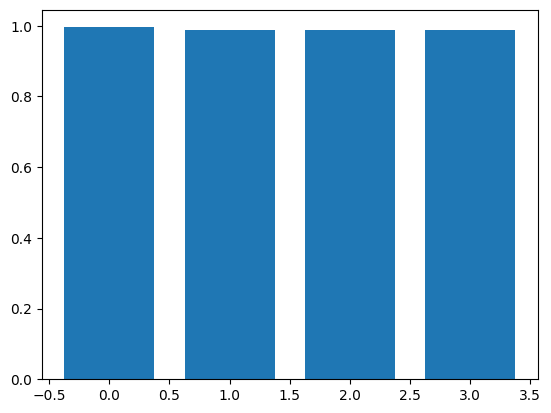

In [172]:
h1=[0.9957,0.9873,0.9873,0.988437]
x1=[0,1,2,3]
dev,harsh1=matplotlib.pyplot.subplots()
harsh1.bar(x1,h1,width=0.75)

In [194]:
checkpoint = "/kaggle/input/bert_bert_finetuned/transformers/default/1/project-11_checkpoints"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

In [196]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [205]:
def tokenize_function(examples):
    return tokenizer(examples["headline"], padding="max_length", truncation=True)

tokenized_test_dataset = train_data['test'].map(tokenize_function, batched=True)

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

In [218]:
train_args = TrainingArguments(
    output_dir="./results",
    report_to="none",
    per_device_eval_batch_size=8
    
)

trainer = Trainer(model=model, args=train_args,compute_metrics=compute_metric)

In [219]:
import torch

with torch.no_grad():
    results = trainer.evaluate(tokenized_test_dataset)
print(results)

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.013472950085997581, 'eval_f1': 0.9981389578163772, 'eval_accuracy': 0.998125, 'eval_precision': 0.999068612232226, 'eval_recall': 0.9972110319181903, 'eval_runtime': 127.6214, 'eval_samples_per_second': 50.148, 'eval_steps_per_second': 3.134}


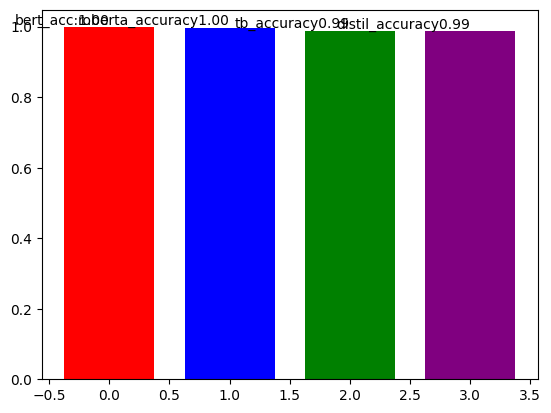

In [241]:
bert_acc=results['eval_accuracy']
roberta_accuracy=metrics_1['eval_accuracy']
tb_accuracy=metrics['eval_accuracy']
distil_accuracy=metrics_3['eval_accuracy']

x1=[0,1,2,3]

labels=[f'bert_acc:{bert_acc:.2f}',f'roberta_accuracy{roberta_accuracy:.2f}',f'tb_accuracy{tb_accuracy:.2f}',f'distil_accuracy{distil_accuracy:.2f}']

accuracies=numpy.array([bert_acc,roberta_accuracy,tb_accuracy,distil_accuracy])

colors = ['red', 'blue', 'green', 'purple', 'orange']
dev,harsh1=matplotlib.pyplot.subplots()
harsh1.bar(x1,accuracies,width=0.75,color=colors)

for i, label in enumerate(labels):
    harsh1.text(x1[i],accuracies[i], label, fontsize=10, ha='right', va='bottom')

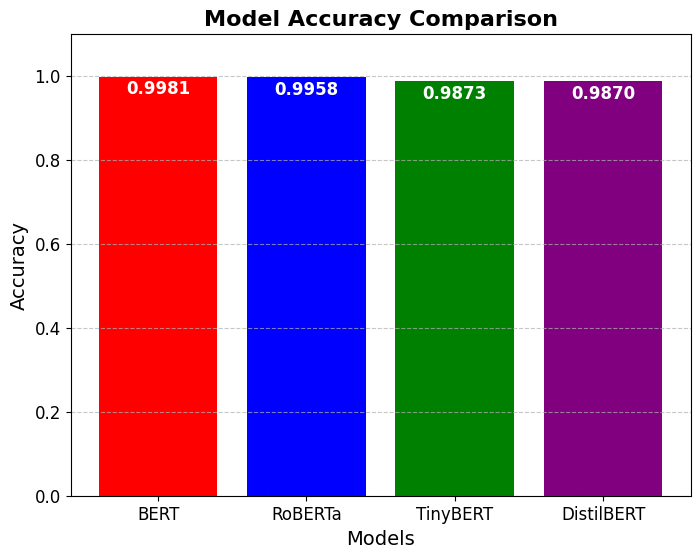

In [243]:
import matplotlib.pyplot as plt
import numpy as np

models = ["BERT", "RoBERTa", "TinyBERT", "DistilBERT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors, width=0.8)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')

# Improve aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


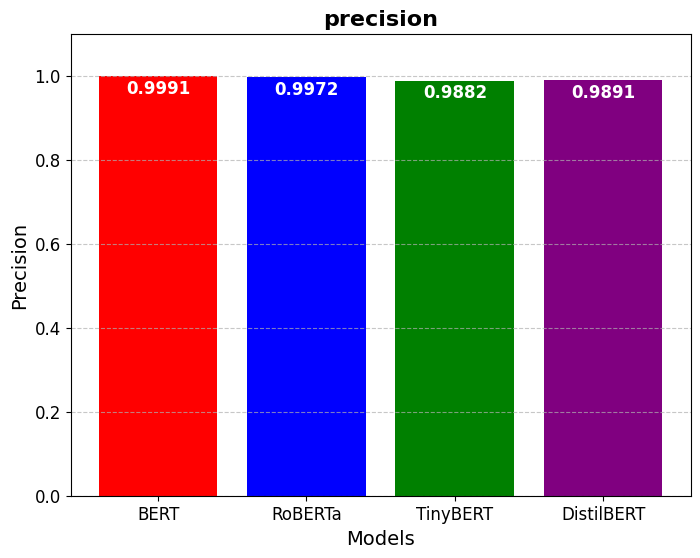

In [246]:
bert_pre=results['eval_precision']
roberta_pre=metrics_1['eval_precision']
tb_pre=metrics['eval_precision']
distil_pre=metrics_3['eval_precision']

precision=numpy.array([bert_pre,roberta_pre,tb_pre,distil_pre])

models = ["BERT", "RoBERTa", "TinyBERT", "DistilBERT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,precision,color=colors,width=0.8)

for bar, acc in zip(bars, precision):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("Precision", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("precision", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


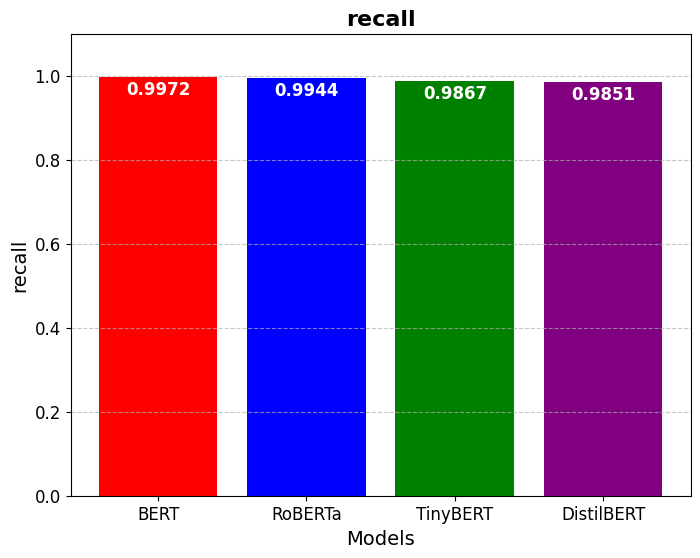

In [247]:
bert_recall=results['eval_recall']
roberta_recall=metrics_1['eval_recall']
tb_recall=metrics['eval_recall']
distil_recall=metrics_3['eval_recall']

recall=numpy.array([bert_recall,roberta_recall,tb_recall,distil_recall])

models = ["BERT", "RoBERTa", "TinyBERT", "DistilBERT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,recall,color=colors,width=0.8)

for bar, acc in zip(bars,recall):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("recall", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("recall", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


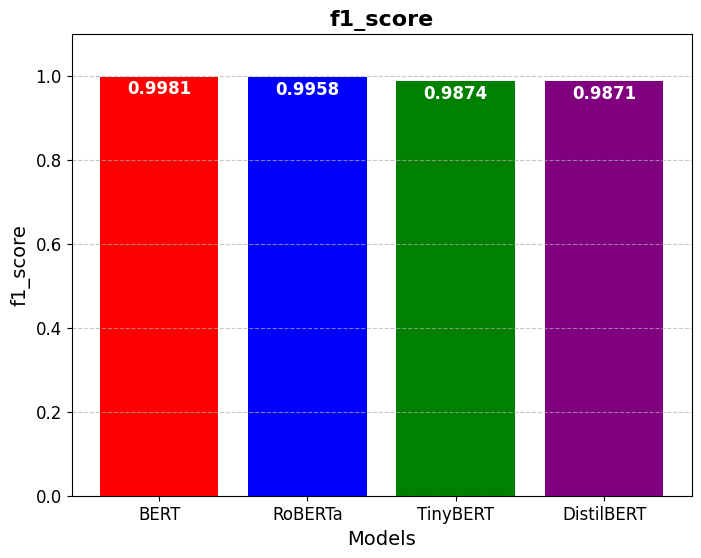

In [249]:
bert_f1=results['eval_f1']
roberta_f1=metrics_1['eval_f1']
tb_f1=metrics['eval_f1']
distil_f1=metrics_3['eval_f1']

f1_score=numpy.array([bert_f1,roberta_f1,tb_f1,distil_f1])

models = ["BERT", "RoBERTa", "TinyBERT", "DistilBERT"]
colors = ["red", "blue", "green", "purple"]

plt.figure(figsize=(8, 6))
bars = plt.bar(models,f1_score,color=colors,width=0.8)

for bar, acc in zip(bars,f1_score):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
             f"{acc:.4f}", ha='center', va='bottom', fontsize=12, color='white', fontweight='bold')

plt.ylim(0, 1.1)
plt.ylabel("f1_score", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.title("f1_score", fontsize=16, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


{'eval_loss': 0.013472950085997581,
 'eval_f1': 0.9981389578163772,
 'eval_accuracy': 0.998125,
 'eval_precision': 0.999068612232226,
 'eval_recall': 0.9972110319181903,
 'eval_runtime': 127.6214,
 'eval_samples_per_second': 50.148,
 'eval_steps_per_second': 3.134}